<a href="https://colab.research.google.com/github/gacostafilho/testes-alura/blob/master/Formac%CC%A7a%CC%83o_Data_Science_Alura_Ana%CC%81lise_explorato%CC%81ria_do_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graciliano Alves da Costa Filho

---
Descobertas: 

Apesar de os filmes de ação e os de aventura terem muitas avaliações e muitos filmes, a popularidade média dos filmes de guerra é maior do que a desses dois gêneros.

A nota média dos filmes do género animation, parece aumentar para filmes lançados mais recentemente ao contrário da nota média de todos os gêneros agregados.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.5
Usando seaborn 0.10.1
Usando scipy 1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
url = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv"
filmes = pd.read_csv(url)
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.set_index('filmeId', inplace=True)

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
url = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv"
notas = pd.read_csv(url)
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
filmes['nota_media'] = notas.groupby('filmeId').mean()['nota']

In [10]:
filmes.head(10)

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185
8,Tom and Huck (1995),Adventure|Children,1995.0,2.875000
9,Sudden Death (1995),Action,1995.0,3.125000


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
contagem = notas.groupby('filmeId').count()['nota']

In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = contagem
filmes.query('total_de_votos >= 50', inplace=True)

In [13]:
filmes.head(10)

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0
10,GoldenEye (1995),Action|Adventure|Thriller,1995.0,3.496212,132.0
11,"American President, The (1995)",Comedy|Drama|Romance,1995.0,3.671429,70.0
16,Casino (1995),Crime|Drama,1995.0,3.926829,82.0
17,Sense and Sensibility (1995),Drama|Romance,1995.0,3.776119,67.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Distribuição notas médias')

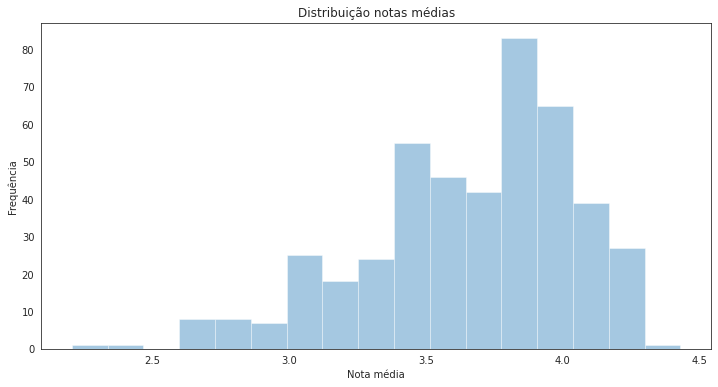

In [14]:
# solução histograma
sns.set_style("white")
ax = sns.distplot(filmes['nota_media'], kde = False)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title('Distribuição notas médias')

Text(0.5, 1.0, 'Distribuição notas médias')

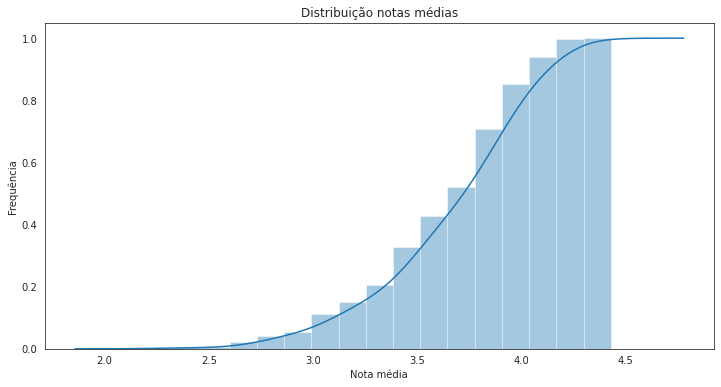

In [15]:
# solução cumulativa
ax = sns.distplot(filmes['nota_media'], hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title('Distribuição notas médias')

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Distribuição de votos')

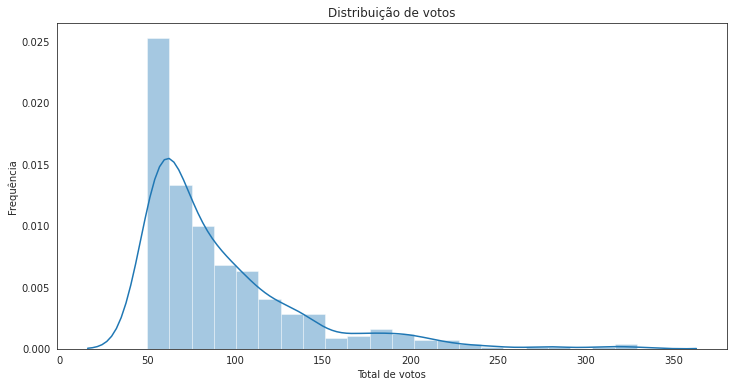

In [16]:
# solução histograma
ax = sns.distplot(filmes['total_de_votos'])
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Total de votos", ylabel="Frequência")
ax.set_title('Distribuição de votos')

Text(0.5, 1.0, 'Distribuição de votos')

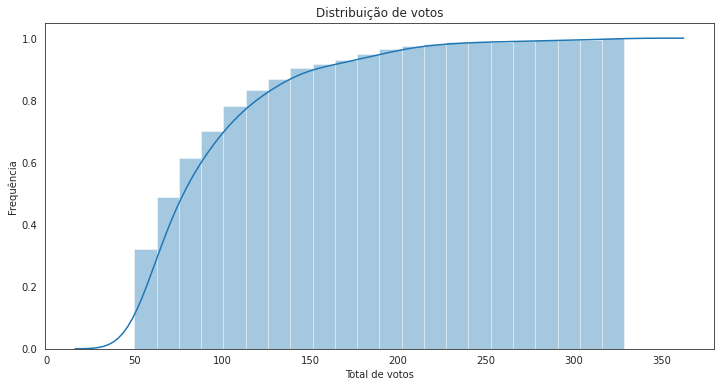

In [17]:
# solução cumulativa
ax = sns.distplot(filmes['total_de_votos'], hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Total de votos", ylabel="Frequência")
ax.set_title('Distribuição de votos')

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

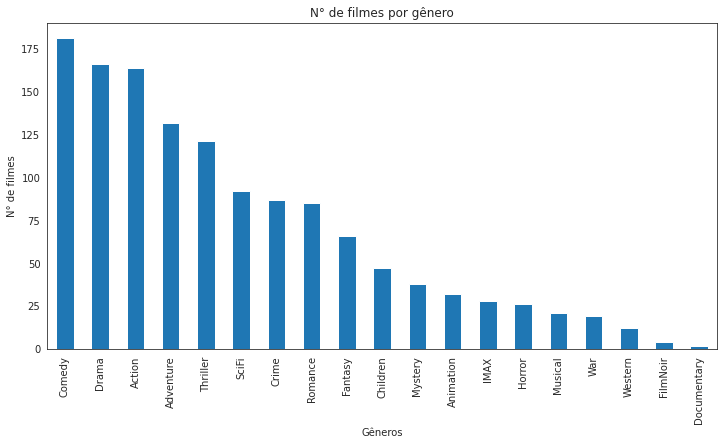

In [22]:
# solução
generos_ordenados = generos.sum().sort_values(ascending = False)
ax = generos_ordenados.plot.bar(figsize=(12,6), title='N° de filmes por gênero')
ax.set_xlabel("Gêneros")
ax.set_ylabel("N° de filmes")
ax

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending = False)

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy         181
Drama          166
Action         164
Adventure      132
Thriller       121
SciFi           92
Crime           87
Romance         85
Fantasy         66
Children        47
Mystery         38
Animation       32
IMAX            28
Horror          26
Musical         21
War             19
Western         12
FilmNoir         4
Documentary      2
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head(10)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0
5,132.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,0.0
6,0.0,0.0,0.0,0.0,70.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,82.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
generos_mais_visualizados = votos_por_genero_por_filme.sum().sort_values(ascending=False)
generos_mais_visualizados

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

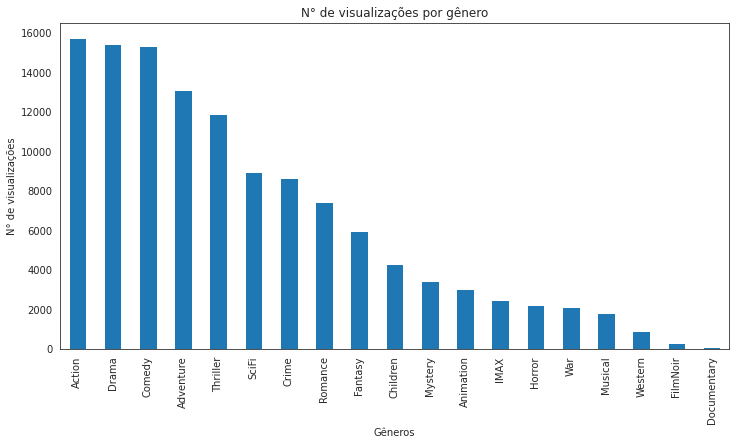

In [27]:
# solução
ax = generos_mais_visualizados.plot.bar(figsize=(12,6), title='N° de visualizações por gênero')
ax.set_xlabel("Gêneros")
ax.set_ylabel("N° de visualizações")
ax

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
popularidade_media_por_genero = (votos_por_genero_por_filme.sum()/generos.sum()).sort_values(ascending=False)
popularidade_media_por_genero

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

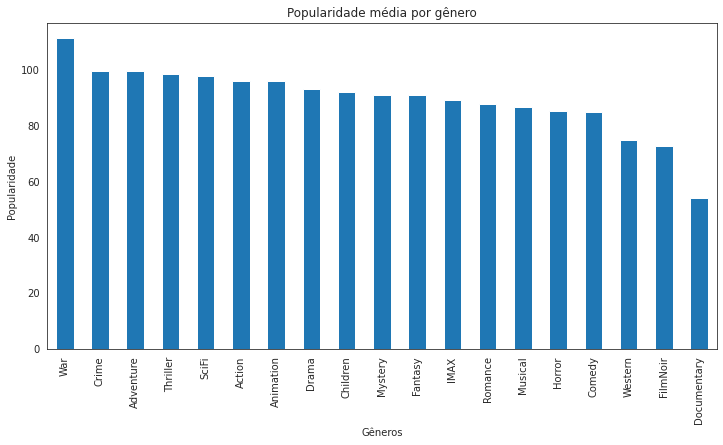

In [29]:
# solução com visualização 
ax = popularidade_media_por_genero.plot.bar(figsize=(12,6), title='Popularidade média por gênero')
ax.set_xlabel("Gêneros")
ax.set_ylabel("Popularidade")
ax

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
Existem muitos filmes de ação com muitas visualizações no total. Existem poucos filmes de guerra com pouca visualização no total. Porém cada filme de guerra é mais popular do que os de ação, ou seja tem uma média de visualização maior.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [30]:
# solução:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7ff67a0155c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff67a026080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff67a026ba8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff67a0267f0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff67a0158d0>,
  <matplotlib.lines.Line2D at 0x7ff67a031748>]}

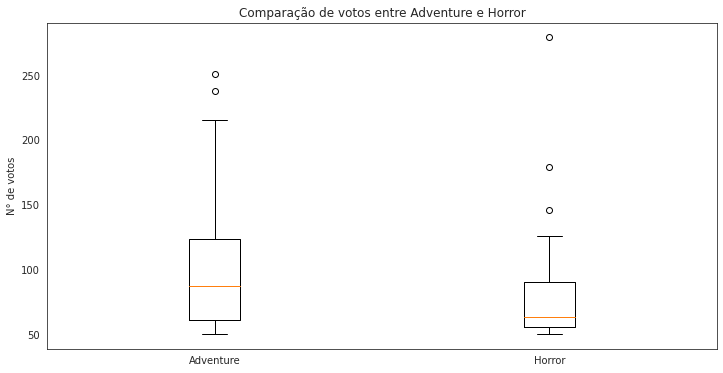

In [31]:
filmes_aventura = filmes.query("Adventure == 1")
filmes_horror = filmes.query("Horror == 1")
plt.figure(figsize=(12,6))
plt.title("Comparação de votos entre Adventure e Horror")
plt.ylabel("N° de votos")
plt.boxplot([filmes_aventura['total_de_votos'], filmes_horror['total_de_votos']], labels=["Adventure","Horror"])

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0, 0.5, 'N° de votos por filme')

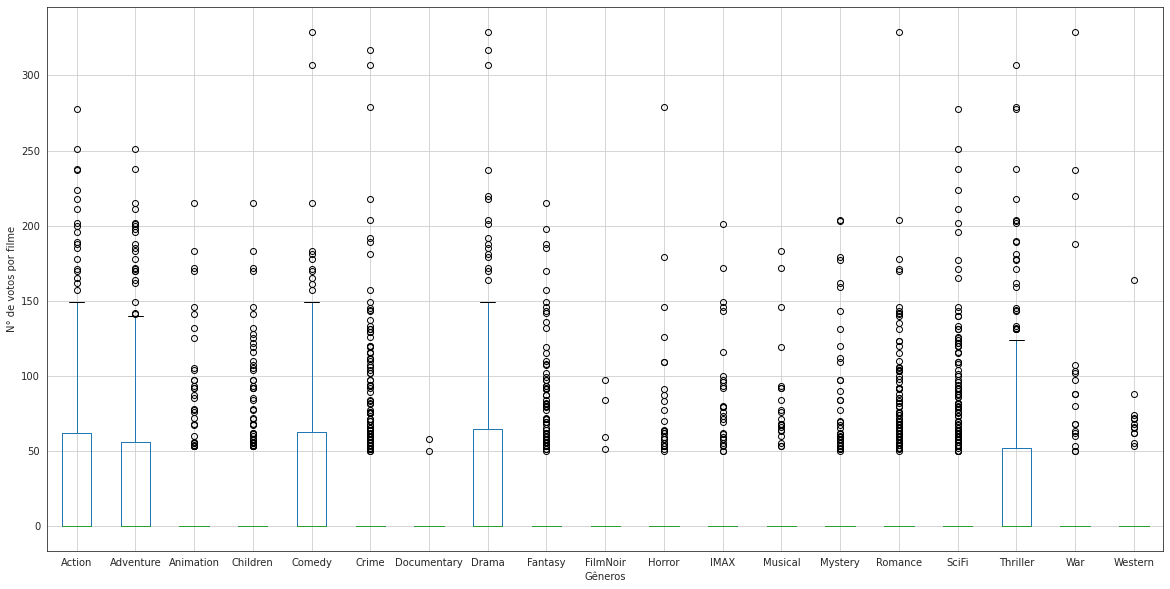

In [32]:
ax = votos_por_genero_por_filme.boxplot(figsize=(20,10))
ax.set_xlabel("Gêneros")
ax.set_ylabel("N° de votos por filme")

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
Sugiro fazer um filme com o gênero Adventure, pois olhando no boxplot de votos a mediana dos filmes adventure é bem mais alta do que as horror. O 3° quartil é bem mais alto também.
Assim um filme do tipo adventure tem bem mais chance de ser mais popular do que um do tipo Horror.
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição de votos de filmes Adventure')

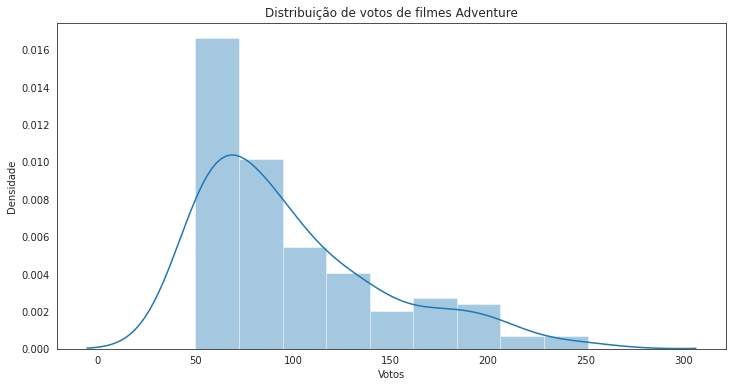

In [33]:
# solucao histograma de aventura
ax = sns.distplot(filmes_aventura['total_de_votos'], kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Votos", ylabel="Densidade")
ax.set_title('Distribuição de votos de filmes Adventure')

Text(0.5, 1.0, 'Distribuição de votos de filmes Adventure')

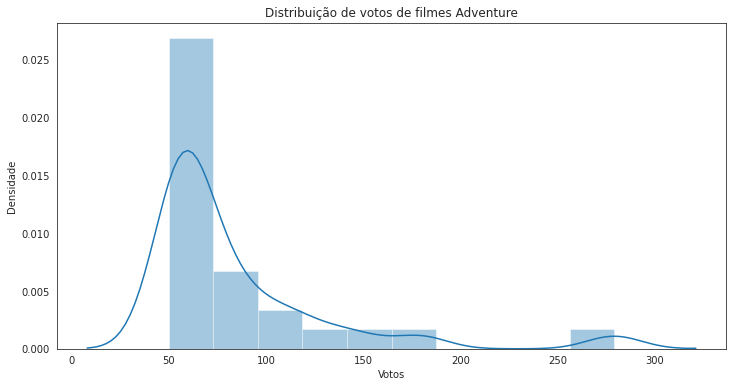

In [34]:
# solucao histograma de horror
ax = sns.distplot(filmes_horror['total_de_votos'], kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Votos", ylabel="Densidade")
ax.set_title('Distribuição de votos de filmes Adventure')

In [35]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from statsmodels.stats.weightstats import zconfint, ztest
from statsmodels.stats.weightstats import DescrStatsW
from scipy.stats import normaltest

_, p_adventure = normaltest(filmes_aventura['total_de_votos'])
_, p_horror = normaltest(filmes_aventura['total_de_votos'])

print('p_value filmes adventure: {}'.format(p_adventure.round(4)))
if p_adventure < 0.05:
  print('Filmes adventure vem de uma distribuição normal')

print('p_value filmes adventure: {}'.format(p_horror.round(4)))
if p_horror < 0.05:
  print('Filmes horror vem de uma distribuição normal')

p_value filmes adventure: 0.0
Filmes adventure vem de uma distribuição normal
p_value filmes adventure: 0.0
Filmes horror vem de uma distribuição normal


In [36]:
# solução com o teste desejado
print(filmes_aventura.shape[0], filmes_horror.index.shape[0])

132 26


Como filmes horror possui poucas amostras (26) o teste mais adequado é o t-test.

In [37]:
desc_filmes_aventura = DescrStatsW(filmes_aventura.total_de_votos)
desc_filmes_horror = DescrStatsW(filmes_horror.total_de_votos)

In [38]:
desc_filmes_aventura.get_compare(desc_filmes_horror).summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,14.1789,10.230,1.386,0.168,-6.028,34.386


### Solução (explique sua conclusão):
Não é possível dizer qual dos filmes teria mais chance de sucesso, pois o p_value (>> 0.05) do teste indica que a diferença entre as distriuições não é significativa. Além disso, observando o intervalo de diferença os filmes de aventura pode ser mais populares, ou menos populares dependendo do caso.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

{'boxes': [<matplotlib.lines.Line2D at 0x7ff679ca7be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff679cb36a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff679cbe208>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff679cb3e10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff679ca7ef0>,
  <matplotlib.lines.Line2D at 0x7ff679cbed30>]}

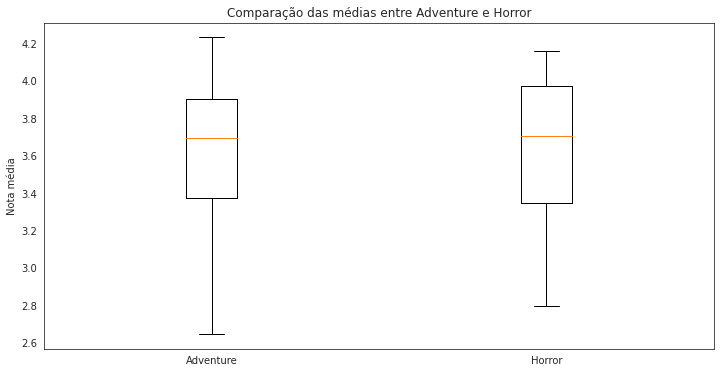

In [39]:
# solução:
plt.figure(figsize=(12,6))
plt.title("Comparação das médias entre Adventure e Horror")
plt.ylabel("Nota média")
plt.boxplot([filmes_aventura['nota_media'], filmes_horror['nota_media']], labels=["Adventure","Horror"])

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução: observando somente o boxplot não é possível afirmar qual gênero teria melhor crítica, pois são bem parecidos, apesar de os quartis do gênero horror parecer levemente maiores.



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição de nota media de filmes Adventure')

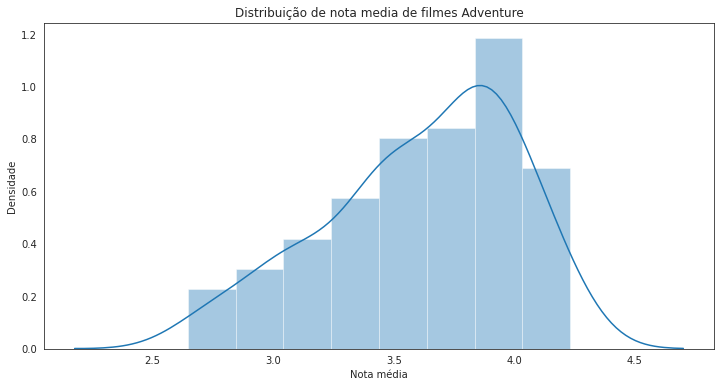

In [40]:
# solucao histograma de aventura
ax = sns.distplot(filmes_aventura['nota_media'], kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title('Distribuição de nota media de filmes Adventure')

Text(0.5, 1.0, 'Distribuição de média de filmes Horror')

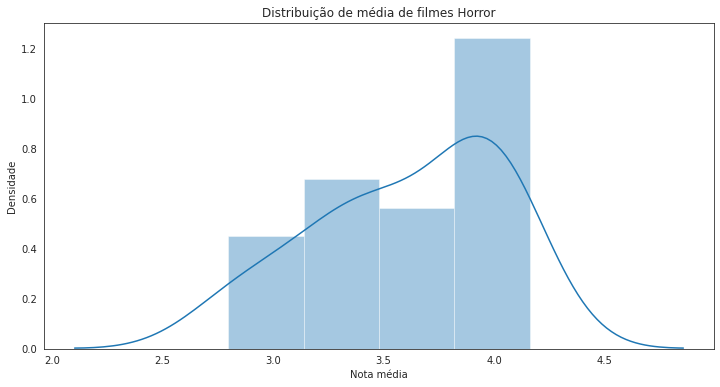

In [41]:
# solucao histograma de horror
ax = sns.distplot(filmes_horror['nota_media'], kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title('Distribuição de média de filmes Horror')

In [42]:
# solução com o teste desejado
_, p_adventure = normaltest(filmes_aventura['nota_media'])
_, p_horror = normaltest(filmes_aventura['nota_media'])

print('p_value filmes adventure: {}'.format(p_adventure.round(4)))
if p_adventure < 0.05:
  print('A distribuição da nota média para filmes adventure vem de uma distribuição normal')

print('p_value filmes adventure: {}'.format(p_horror.round(4)))
if p_horror < 0.05:
  print('A distribuição da nota média para filmes horror vem de uma distribuição normal')

p_value filmes adventure: 0.0128
A distribuição da nota média para filmes adventure vem de uma distribuição normal
p_value filmes adventure: 0.0128
A distribuição da nota média para filmes horror vem de uma distribuição normal


In [43]:
desc_filmes_aventura = DescrStatsW(filmes_aventura.nota_media)
desc_filmes_horror = DescrStatsW(filmes_horror.nota_media)
desc_filmes_aventura.get_compare(desc_filmes_horror).summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0048,0.085,0.057,0.955,-0.163,0.173


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: Sim, continuo com a mesmo opinião. O t-test só confirma que não é possível indicar qual gênero teria a melhor crítica, pois os p_values não tem significância.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: os testes estatísticos para o número de votos e para nota média mostram que não há diferença significativa entre esses gêneros. O teste visual para nota média também não mostra tanta diferença. Resta somente o teste visual para o número de votos, aonde o gênero adventure aparenta ser mais popular do que o outro gênero. Assim eu recomendaria o gênero Adventure.



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [44]:
votos_por_genero_por_filme.sum()

Action         15734.0
Adventure      13117.0
Animation       3066.0
Children        4331.0
Comedy         15330.0
Crime           8649.0
Documentary      108.0
Drama          15445.0
Fantasy         5993.0
FilmNoir         291.0
Horror          2215.0
IMAX            2492.0
Musical         1822.0
Mystery         3452.0
Romance         7444.0
SciFi           8989.0
Thriller       11907.0
War             2113.0
Western          900.0
dtype: float64

In [45]:
# solução: calculando os 2 generos mais votados
#os filmes mais votados são ação e aventura
filmes_acao = filmes.query('Action == 1')
#já exista Df para os filmes de aventura
filmes_aventura.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,GoldenEye (1995),1995.0,3.496212,132.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
95,Broken Arrow (1996),1996.0,3.023810,84.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
150,Apollo 13 (1995),1995.0,3.845771,201.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [46]:
# solução: encontrando os top 5 filmes desses generos
top5_filmes_acao = filmes_acao.sort_values(by=['nota_media'], ascending=False).head()
top5_filmes_acao

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
58559,"Dark Knight, The (2008)",2008.0,4.238255,149.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1197,"Princess Bride, The (1987)",1987.0,4.232394,142.0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
260,Star Wars: Episode IV - A New Hope (1977),1977.0,4.231076,251.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1208,Apocalypse Now (1979),1979.0,4.219626,107.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [47]:
top5_filmes_aventura = filmes_aventura.sort_values(by=['nota_media'], ascending=False).head()
top5_filmes_aventura

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1197,"Princess Bride, The (1987)",1987.0,4.232394,142.0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
260,Star Wars: Episode IV - A New Hope (1977),1977.0,4.231076,251.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1196,Star Wars: Episode V - The Empire Strikes Back...,1980.0,4.215640,211.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1198,Raiders of the Lost Ark (Indiana Jones and the...,1981.0,4.207500,200.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
908,North by Northwest (1959),1959.0,4.184211,57.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [48]:
# solucao
matriz_correl = filmes.corr()
matriz_correl.sort_values(by=['nota_media'], ascending=False)

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
nota_media,-0.159146,1.000000,0.342584,-0.154089,-0.079985,0.043071,-0.030360,-0.256005,0.190220,-0.003486,0.277662,-0.020986,0.081766,-0.033877,0.064931,-0.008529,0.129914,-0.072002,-0.136717,-0.016782,0.125615,-0.059642
total_de_votos,-0.028709,0.342584,1.000000,0.066239,0.104380,0.023442,0.001764,-0.128527,0.079766,-0.055010,0.018779,-0.009976,-0.039408,-0.036132,-0.016285,-0.024741,-0.007051,-0.045427,0.063802,0.085525,0.087999,-0.060789
Drama,0.028411,0.277662,0.018779,-0.253573,-0.290255,-0.121935,-0.125559,-0.288999,0.092210,0.018156,1.000000,-0.121680,-0.023335,-0.110364,-0.082535,-0.081810,0.016269,0.066415,-0.159169,-0.037764,0.205919,-0.012197
Crime,0.060993,0.190220,0.079766,0.061890,-0.241256,-0.091665,-0.130389,-0.126158,1.000000,-0.032710,0.092210,-0.155243,0.193444,-0.048878,-0.032924,-0.108315,0.114410,-0.207496,-0.178411,0.248836,-0.074806,-0.081033
Mystery,0.005591,0.129914,-0.007051,-0.063915,-0.090344,-0.052933,-0.077583,-0.200222,0.114410,-0.020292,0.016269,-0.035543,0.311831,0.130315,0.021028,-0.067193,1.000000,-0.064884,-0.015237,0.320529,-0.063765,-0.050269
War,0.026118,0.125615,0.087999,0.070618,-0.086730,-0.058093,-0.071703,-0.082082,-0.074806,-0.014029,0.205919,-0.055809,-0.019884,-0.051993,-0.008336,-0.046454,-0.063765,-0.016625,-0.106436,-0.052561,1.000000,0.033838
FilmNoir,0.002235,0.081766,-0.039408,-0.022520,-0.061015,-0.026203,-0.032341,-0.077683,0.193444,-0.006328,-0.023335,-0.039262,1.000000,-0.023451,-0.024394,-0.020953,0.311831,-0.045701,-0.048008,0.156159,-0.019884,-0.015675
IMAX,0.248002,0.064931,-0.016285,0.129896,0.217954,0.107701,0.092512,-0.155010,-0.032924,-0.017211,-0.082535,0.153250,-0.024394,-0.024358,1.000000,0.030240,0.021028,-0.077298,0.120340,-0.010974,-0.008336,-0.042636
Animation,-0.052874,0.043071,0.023442,-0.173589,0.163576,1.000000,0.753654,0.125706,-0.091665,-0.018487,-0.121935,0.227460,-0.026203,-0.068516,0.107701,0.430701,-0.052933,0.021108,-0.097383,-0.167796,-0.058093,-0.045797
Documentary,0.047746,-0.003486,-0.055010,-0.050596,-0.043048,-0.018487,-0.022818,0.013323,-0.032710,1.000000,0.018156,-0.027700,-0.006328,-0.016545,-0.017211,-0.014783,-0.020292,-0.032243,-0.033871,-0.040520,-0.014029,-0.011059


gênero com maior correlação com nota_media: Drama e Crime.

---

gêneros com menor correlação: Comedy e Action

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [49]:
# solucao
matriz_correl.sort_values(by=['total_de_votos'], ascending=False)

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
total_de_votos,-0.028709,0.342584,1.000000,0.066239,0.104380,0.023442,0.001764,-0.128527,0.079766,-0.055010,0.018779,-0.009976,-0.039408,-0.036132,-0.016285,-0.024741,-0.007051,-0.045427,0.063802,0.085525,0.087999,-0.060789
nota_media,-0.159146,1.000000,0.342584,-0.154089,-0.079985,0.043071,-0.030360,-0.256005,0.190220,-0.003486,0.277662,-0.020986,0.081766,-0.033877,0.064931,-0.008529,0.129914,-0.072002,-0.136717,-0.016782,0.125615,-0.059642
Adventure,0.114268,-0.079985,0.104380,0.333591,1.000000,0.163576,0.178956,-0.090515,-0.241256,-0.043048,-0.290255,0.243373,-0.061015,-0.096786,0.217954,-0.049984,-0.090344,-0.173745,0.278520,-0.005431,-0.086730,0.044838
War,0.026118,0.125615,0.087999,0.070618,-0.086730,-0.058093,-0.071703,-0.082082,-0.074806,-0.014029,0.205919,-0.055809,-0.019884,-0.051993,-0.008336,-0.046454,-0.063765,-0.016625,-0.106436,-0.052561,1.000000,0.033838
Thriller,0.104458,-0.016782,0.085525,0.311401,-0.005431,-0.167796,-0.207105,-0.364583,0.248836,-0.040520,-0.037764,-0.180585,0.156159,0.064634,-0.010974,-0.134176,0.320529,-0.203024,0.139962,1.000000,-0.052561,-0.100380
Crime,0.060993,0.190220,0.079766,0.061890,-0.241256,-0.091665,-0.130389,-0.126158,1.000000,-0.032710,0.092210,-0.155243,0.193444,-0.048878,-0.032924,-0.108315,0.114410,-0.207496,-0.178411,0.248836,-0.074806,-0.081033
Action,0.140392,-0.154089,0.066239,1.000000,0.333591,-0.173589,-0.213311,-0.291578,0.061890,-0.050596,-0.253573,-0.118162,-0.022520,-0.009411,0.129896,-0.145649,-0.063915,-0.200278,0.325969,0.311401,0.070618,0.046621
SciFi,0.069839,-0.136717,0.063802,0.325969,0.278520,-0.097383,-0.101054,-0.213558,-0.178411,-0.033871,-0.159169,-0.147863,-0.048008,0.016164,0.120340,-0.086035,-0.015237,-0.188324,1.000000,0.139962,-0.106436,-0.015505
Animation,-0.052874,0.043071,0.023442,-0.173589,0.163576,1.000000,0.753654,0.125706,-0.091665,-0.018487,-0.121935,0.227460,-0.026203,-0.068516,0.107701,0.430701,-0.052933,0.021108,-0.097383,-0.167796,-0.058093,-0.045797
Drama,0.028411,0.277662,0.018779,-0.253573,-0.290255,-0.121935,-0.125559,-0.288999,0.092210,0.018156,1.000000,-0.121680,-0.023335,-0.110364,-0.082535,-0.081810,0.016269,0.066415,-0.159169,-0.037764,0.205919,-0.012197


gênero com maior correlação com total_de_votos: Adventure e War.

---

gêneros com menor correlação: Comedy e Western

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0.5, 1.0, 'Relação entre Ano de lançamento e nota média dos filmes')

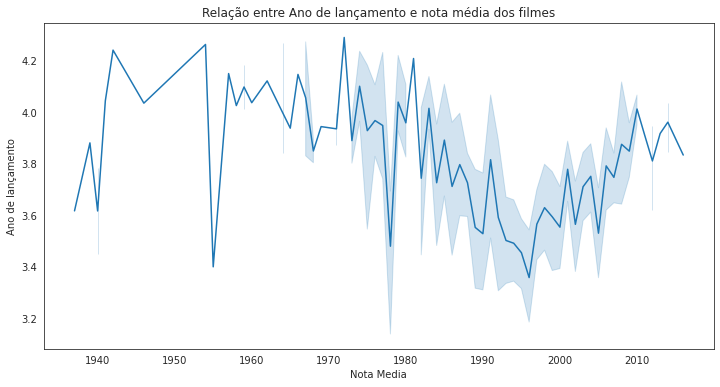

In [50]:
# solucao
ax = sns.lineplot(x='ano_de_lancamento', y='nota_media', data=filmes)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Nota Media", ylabel="Ano de lançamento")
ax.set_title('Relação entre Ano de lançamento e nota média dos filmes')

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [51]:
# solução (código)
filmes.corr()

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
ano_de_lancamento,1.000000,-0.159146,-0.028709,0.140392,0.114268,-0.052874,-0.149019,0.019272,0.060993,0.047746,0.028411,-0.076776,0.002235,-0.026873,0.248002,-0.296174,0.005591,-0.024589,0.069839,0.104458,0.026118,-0.062539
nota_media,-0.159146,1.000000,0.342584,-0.154089,-0.079985,0.043071,-0.030360,-0.256005,0.190220,-0.003486,0.277662,-0.020986,0.081766,-0.033877,0.064931,-0.008529,0.129914,-0.072002,-0.136717,-0.016782,0.125615,-0.059642
total_de_votos,-0.028709,0.342584,1.000000,0.066239,0.104380,0.023442,0.001764,-0.128527,0.079766,-0.055010,0.018779,-0.009976,-0.039408,-0.036132,-0.016285,-0.024741,-0.007051,-0.045427,0.063802,0.085525,0.087999,-0.060789
Action,0.140392,-0.154089,0.066239,1.000000,0.333591,-0.173589,-0.213311,-0.291578,0.061890,-0.050596,-0.253573,-0.118162,-0.022520,-0.009411,0.129896,-0.145649,-0.063915,-0.200278,0.325969,0.311401,0.070618,0.046621
Adventure,0.114268,-0.079985,0.104380,0.333591,1.000000,0.163576,0.178956,-0.090515,-0.241256,-0.043048,-0.290255,0.243373,-0.061015,-0.096786,0.217954,-0.049984,-0.090344,-0.173745,0.278520,-0.005431,-0.086730,0.044838
Animation,-0.052874,0.043071,0.023442,-0.173589,0.163576,1.000000,0.753654,0.125706,-0.091665,-0.018487,-0.121935,0.227460,-0.026203,-0.068516,0.107701,0.430701,-0.052933,0.021108,-0.097383,-0.167796,-0.058093,-0.045797
Children,-0.149019,-0.030360,0.001764,-0.213311,0.178956,0.753654,1.000000,0.119962,-0.130389,-0.022818,-0.125559,0.371888,-0.032341,-0.084567,0.092512,0.406724,-0.077583,-0.016294,-0.101054,-0.207105,-0.071703,-0.056526
Comedy,0.019272,-0.256005,-0.128527,-0.291578,-0.090515,0.125706,0.119962,1.000000,-0.126158,0.013323,-0.288999,0.095479,-0.077683,-0.028315,-0.155010,0.054861,-0.200222,0.229377,-0.213558,-0.364583,-0.082082,0.004876
Crime,0.060993,0.190220,0.079766,0.061890,-0.241256,-0.091665,-0.130389,-0.126158,1.000000,-0.032710,0.092210,-0.155243,0.193444,-0.048878,-0.032924,-0.108315,0.114410,-0.207496,-0.178411,0.248836,-0.074806,-0.081033
Documentary,0.047746,-0.003486,-0.055010,-0.050596,-0.043048,-0.018487,-0.022818,0.013323,-0.032710,1.000000,0.018156,-0.027700,-0.006328,-0.016545,-0.017211,-0.014783,-0.020292,-0.032243,-0.033871,-0.040520,-0.014029,-0.011059


In [52]:
filmes.query('ano_de_lancamento <= 1970').mean()['total_de_votos']

68.6923076923077

In [53]:
filmes.query('ano_de_lancamento > 1970').mean()['total_de_votos']

93.33490566037736

### Solução (explicação): O gráfico e o coeficiente sugerem um correlação negativa entre ano de lançamento e nota média dos filmes. Ou seja, sugere que a média dos filmes mais novos tede a ser mais baixa do que os mais antigos. Um problema que pode causar esse tipo de correlação é existir menos votos para os filmes mais antigos, o que poderia elevar a média deles.



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.08, 'Dispersão entre nota média, total de votos e ano de lançamento')

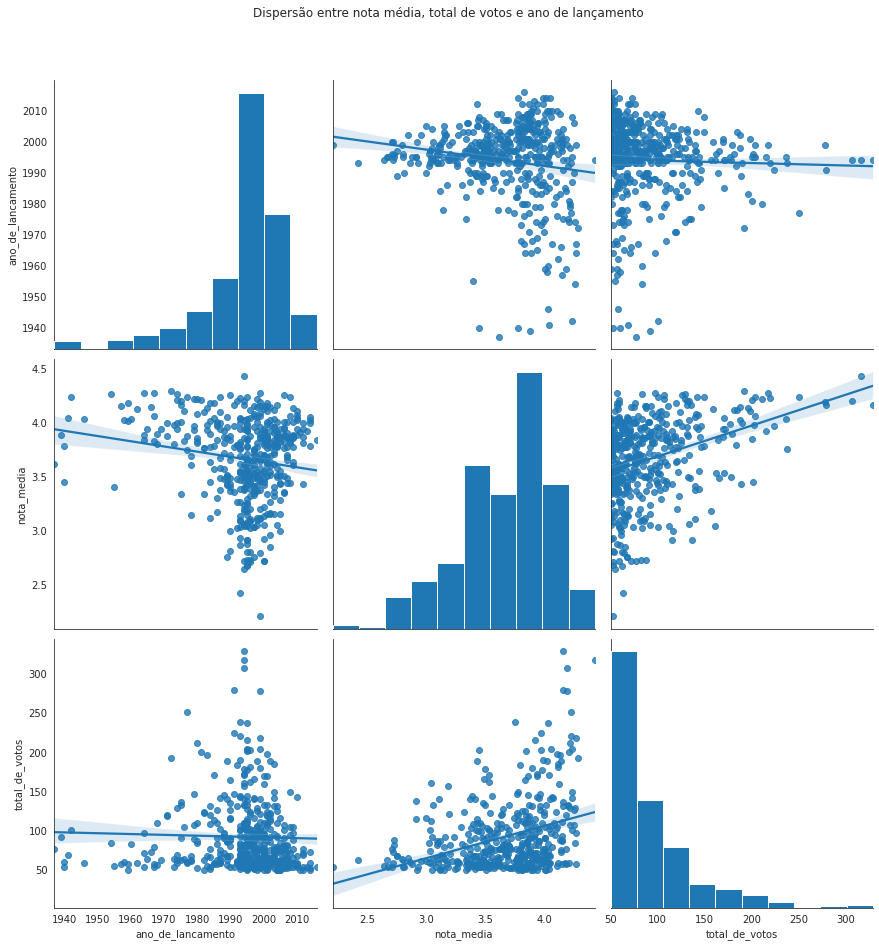

In [54]:
# solução
infos = ['ano_de_lancamento', 'nota_media', 'total_de_votos']
ax = sns.pairplot(filmes, x_vars=infos, y_vars=infos, kind='reg', height=4)
ax.fig.suptitle("Dispersão entre nota média, total de votos e ano de lançamento", y=1.08)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.08, 'Dispersão entre nota média, total de votos e ano de lançamento')

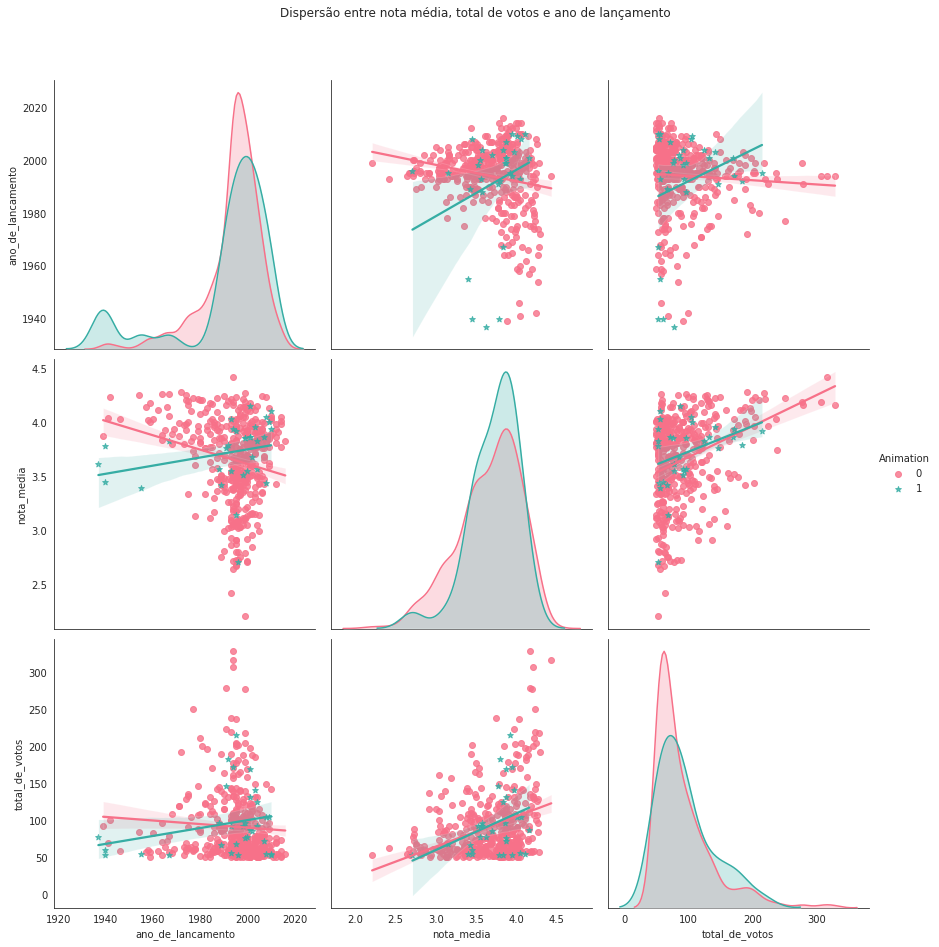

In [55]:
infos = ['ano_de_lancamento', 'nota_media', 'total_de_votos']
ax = sns.pairplot(filmes, x_vars=infos, y_vars=infos, kind='reg', height=4, hue='Animation', markers=['o','*'], palette = 'husl')
ax.fig.suptitle("Dispersão entre nota média, total de votos e ano de lançamento", y=1.08)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
A nota média para o filmes de animation parece aumentar para filmes mais recentes. A correlação parece linear, apesar de alguns possíveis outliers.

O total de votos parece aumentar em anos mais recentes para os filmes de animation. A correlação parece linear pois não há pontos com notas muitos baixas nos primeiros anos.

A nota média dos demais filmes agrupados parece diminuir com o tempo. É necessário investigar mais a fundo sobre essa correlação para mais conclusões.

Minha hipótese para os filmes do tipo animation é que os efeitos gráficos dos filmes melhoraram ao longo do tempo o que poderia melhorar a avaliação dos filmes.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [56]:
# solução

Text(0.5, 1.0, 'Distribuição das notas médias por usuário')

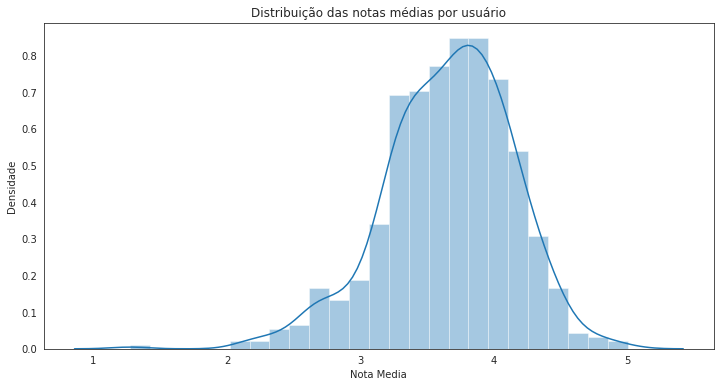

In [70]:
nota_media_usuario = notas.groupby('usuarioId').mean()['nota']
ax = sns.distplot(nota_media_usuario)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Nota Media", ylabel="Densidade")
ax.set_title('Distribuição das notas médias por usuário')

Text(0.5, 1.0, 'Boxplot - Distribuição das notas médias por usuário')

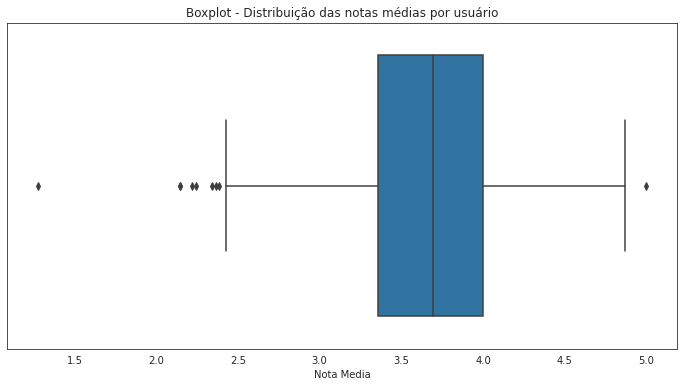

In [71]:
ax = sns.boxplot(nota_media_usuario)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Nota Media")
ax.set_title('Boxplot - Distribuição das notas médias por usuário')

In [66]:
_, p_media_usuario = normaltest(nota_media_usuario)
p_media_usuario

1.712799322113672e-09

Conclusão 1: Observando o gráfico de distribuição das notas médias por usuário se assemelha à uma normal. Isso pode ser confirmado pelo normaltest que mostra um p_value bem baixo.

In [59]:
#a coluna momento representa o tempo em segundos desde meia noite de 01/01/1970
import numpy as np
segundos_ano = 8760*3600
notas['ano_avaliacao'] = (notas['momento']/segundos_ano).apply(np.floor) + 1970
notas.sort_values(by='ano_avaliacao')

,usuarioId,filmeId,nota,momento,ano_avaliacao
83449,530,440,4.0,843227051,1996.0
6321,43,11,4.0,848993928,1996.0
6320,43,10,4.0,848993747,1996.0
6319,43,8,5.0,848994814,1996.0
6318,43,7,5.0,848994392,1996.0
...,...,...,...,...,...
61233,401,32031,3.5,1514346939,2018.0
90128,586,6365,4.0,1529901492,2018.0
61231,401,30793,3.0,1514347062,2018.0
61229,401,8360,3.5,1514347514,2018.0


Text(0.5, 1.0, 'Distribuição das notas médias por usuário')

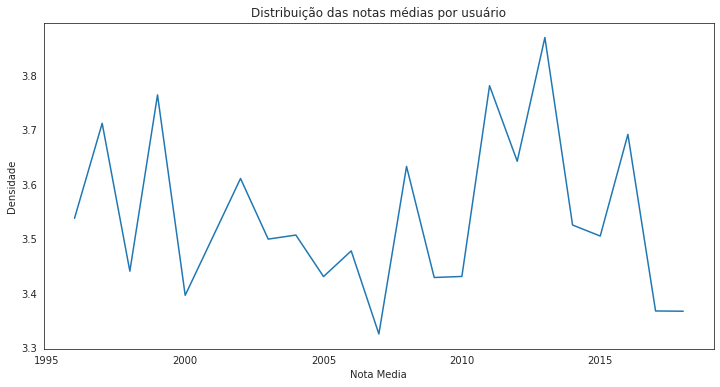

In [72]:
nota_media_ano = notas.groupby('ano_avaliacao').mean()['nota']
ax = sns.lineplot(x=nota_media_ano.index, y=nota_media_ano.values, )
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Nota Media", ylabel="Densidade")
ax.set_title('Distribuição das notas médias por usuário')

In [65]:
notas.corr()

,usuarioId,filmeId,nota,momento,ano_avaliacao
usuarioId,1.000000,0.006773,-0.049348,0.097151,0.099230
filmeId,0.006773,1.000000,-0.004061,0.503669,0.502929
nota,-0.049348,-0.004061,1.000000,-0.005802,-0.007409
momento,0.097151,0.503669,-0.005802,1.000000,0.999163
ano_avaliacao,0.099230,0.502929,-0.007409,0.999163,1.000000


Conclusão 2: não há correlação entre o ano de avaliação de e as notas médias dos filmes naquele ano. O valor do R² é muito baixo.